## Question 1
### Import Libraries for data manipulation and analysis 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 



import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
df = pd.read_csv('energydata_complete.csv')

### Dataset first 5 rows 

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

### Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Transform the feature 'Date' from object type into datetime type 

In [6]:
#convert object to datetime format
df['date'] = pd.to_datetime(df['date'])


In [7]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

### Change the indexof the dataframe to the date column in order to proceed with time series analysis 


In [8]:
#Set date column as Datetime index 
df = df.set_index('date')
df.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Add new columns into the dataset: Year, Month, and Weekday 

In [9]:
# Add columns with year, month, and weekday name
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday_name'] = df.index.strftime('%A')

In [10]:
df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,weekday_name
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,Friday
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,Friday
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,Friday
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,Friday
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,2016,5,Friday


In [11]:
data = df[['Appliances']]

data.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [12]:
# Maximum value
data.index.max()

Timestamp('2016-05-27 18:00:00')

In [13]:
# Minimum value
data.index.min()

Timestamp('2016-01-11 17:00:00')

## Visualizing Data and Time series 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150


In [15]:
data.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


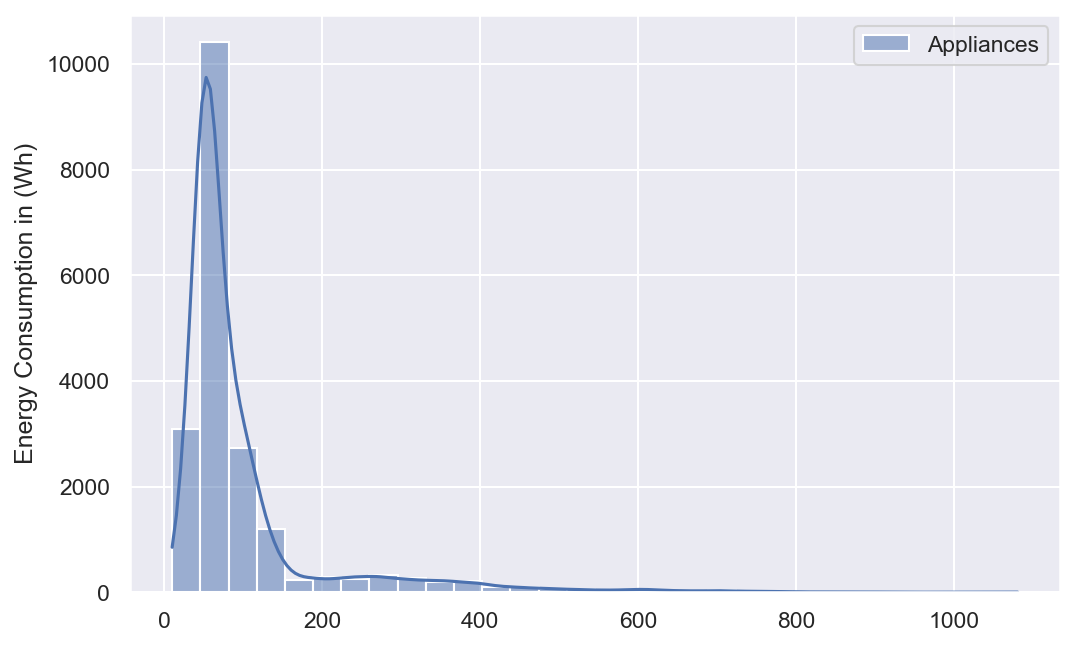

In [16]:
ax = sns.histplot(data=data, bins=30, kde=True)

ax.set_ylabel('Energy Consumption in (Wh)');


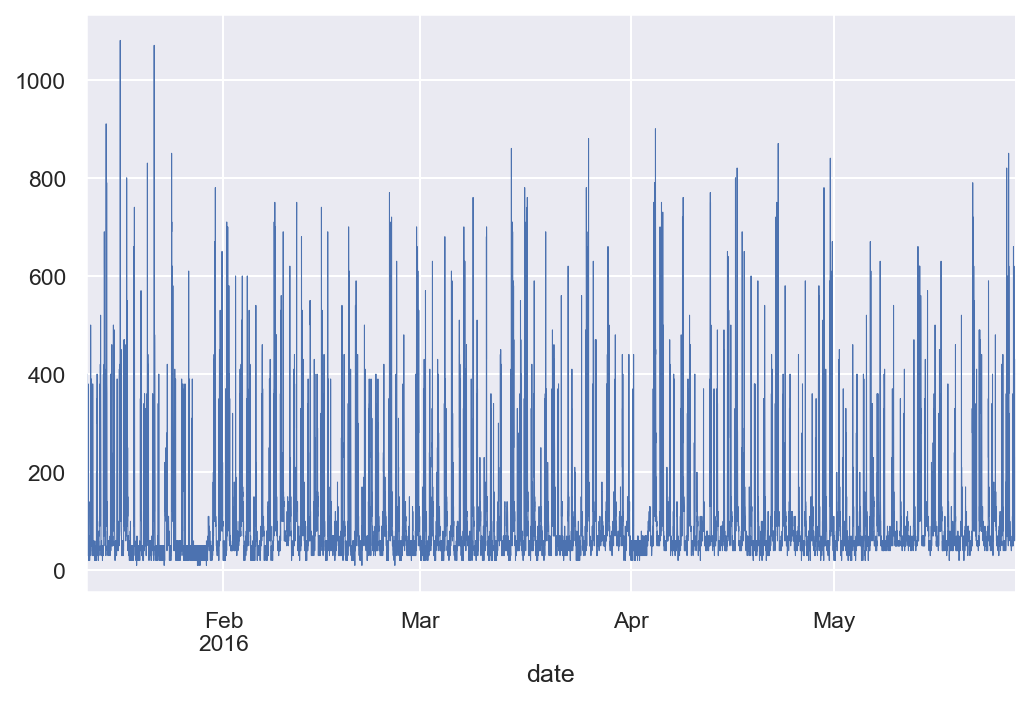

In [17]:
df['Appliances'].plot(linewidth=0.5);

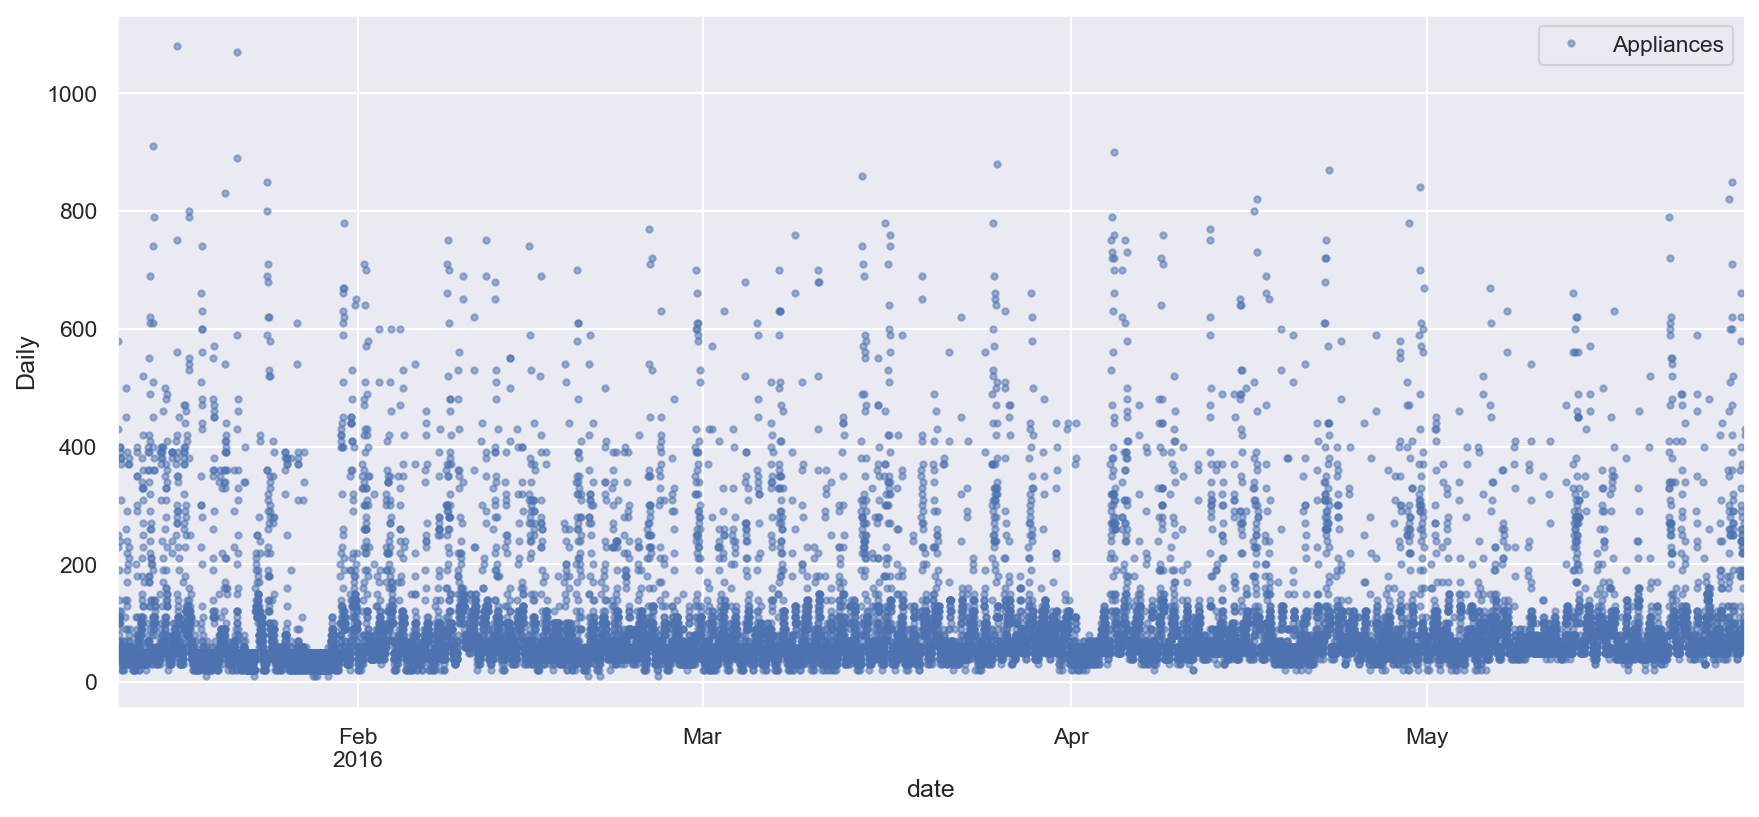

In [18]:
cols_to_plot = ['Appliances']
axes = df[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)
for ax in axes:
 ax.set_ylabel('Daily')


As it has shown in the plots above, we have the  y-axis showing the electricity consumption and the x-axis illustrating the months. 

We can see there are too much data as it has been presented by every 10 minutes. It seems that the highest peaks consumption are in the January month. 
There is a significant fall at the end of January and beginning of April months.

## Resampling
It is often required to resample the dataset at lower or higher frequencies. The resampling will be performed based on an aggregation or group operations. I have resample the data based on houly, daily and weekly, also performed the visualization plots to compare the results. 


### Visualization of hourly mean time series

In [19]:
power_hourly_mean = data.resample('H').mean()
power_hourly_mean

,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333
...,...
2016-05-27 14:00:00,101.666667
2016-05-27 15:00:00,76.666667
2016-05-27 16:00:00,135.000000


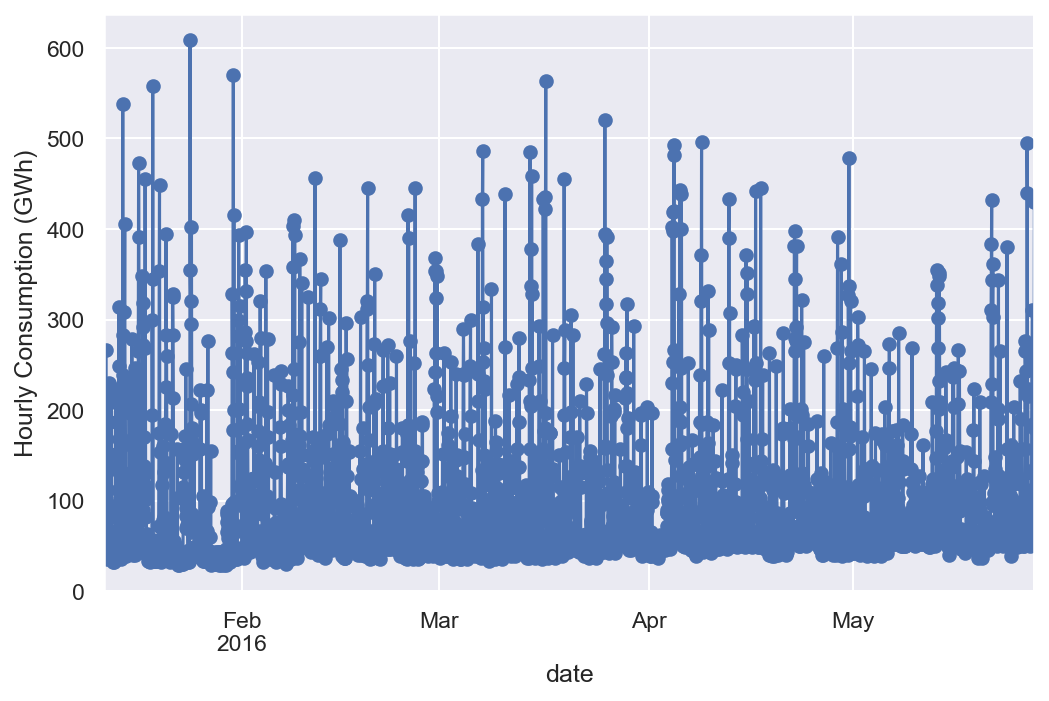

In [20]:
ax = power_hourly_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Hourly Consumption (GWh)');


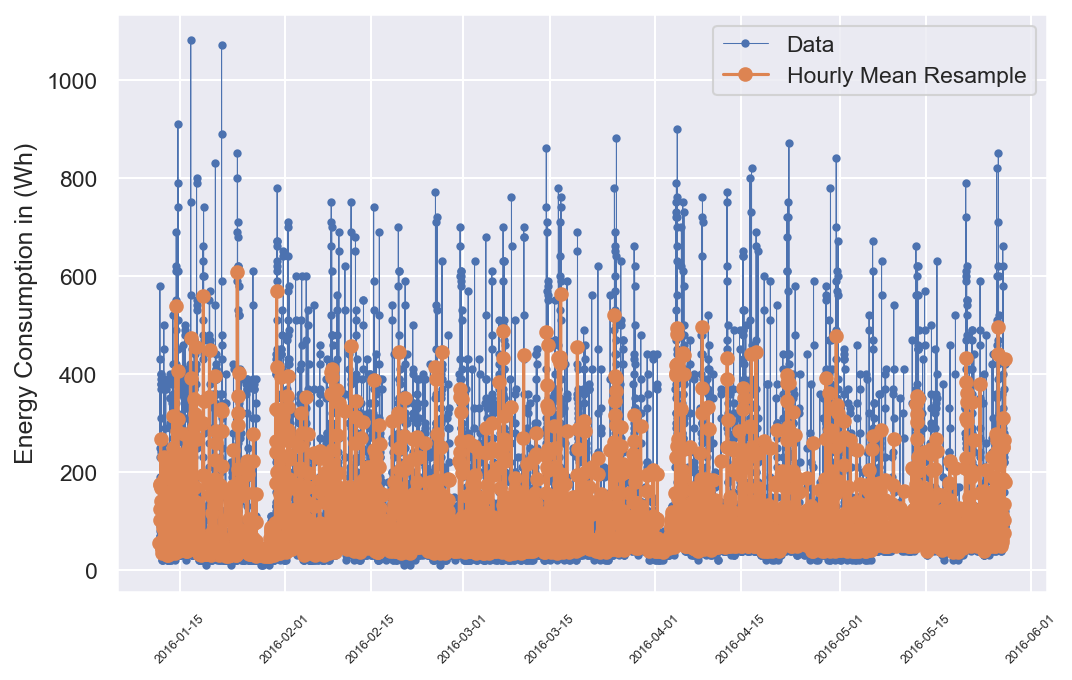

In [21]:
fig, ax = plt.subplots()
ax.plot(data['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Data')
ax.plot(power_hourly_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Hourly Mean Resample')
ax.set_ylabel('Energy Consumption in (Wh)')
plt.xticks(rotation=45, fontsize=6)

ax.legend();

## Daily average of Energy consumption 

In [22]:
power_daily_mean = data.resample('D').mean()
power_daily_mean

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-05-23,83.055556
2016-05-24,96.180556
2016-05-25,83.888889


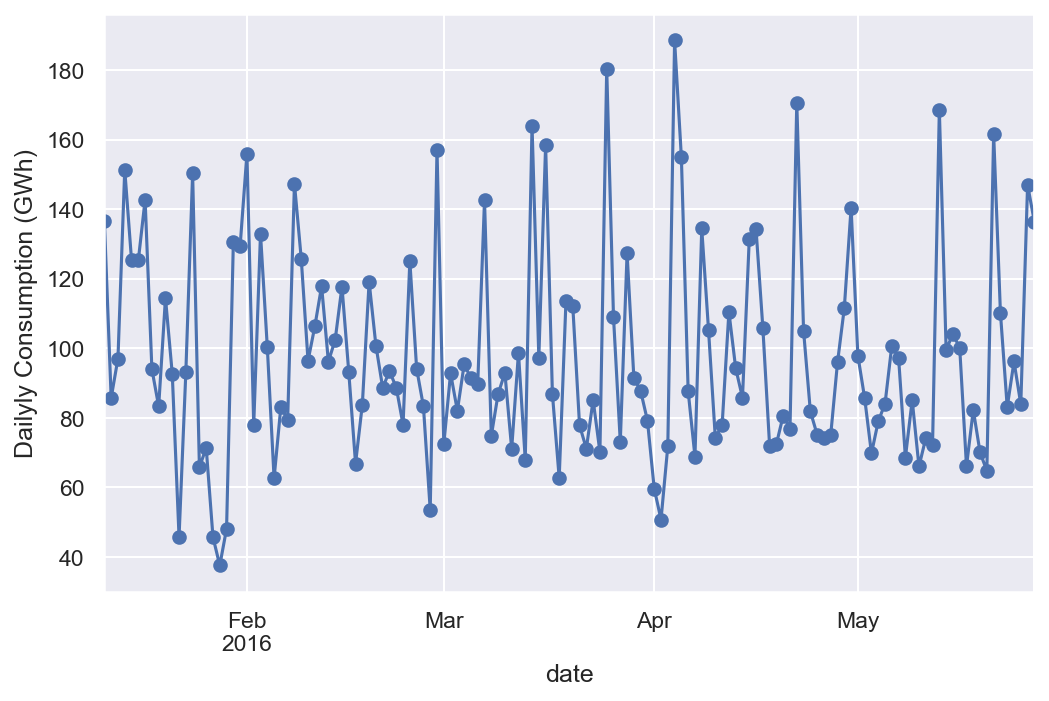

In [23]:
ax = power_daily_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Dailyly Consumption (GWh)');


The daily mean time series show us a better clear visualization of the data.

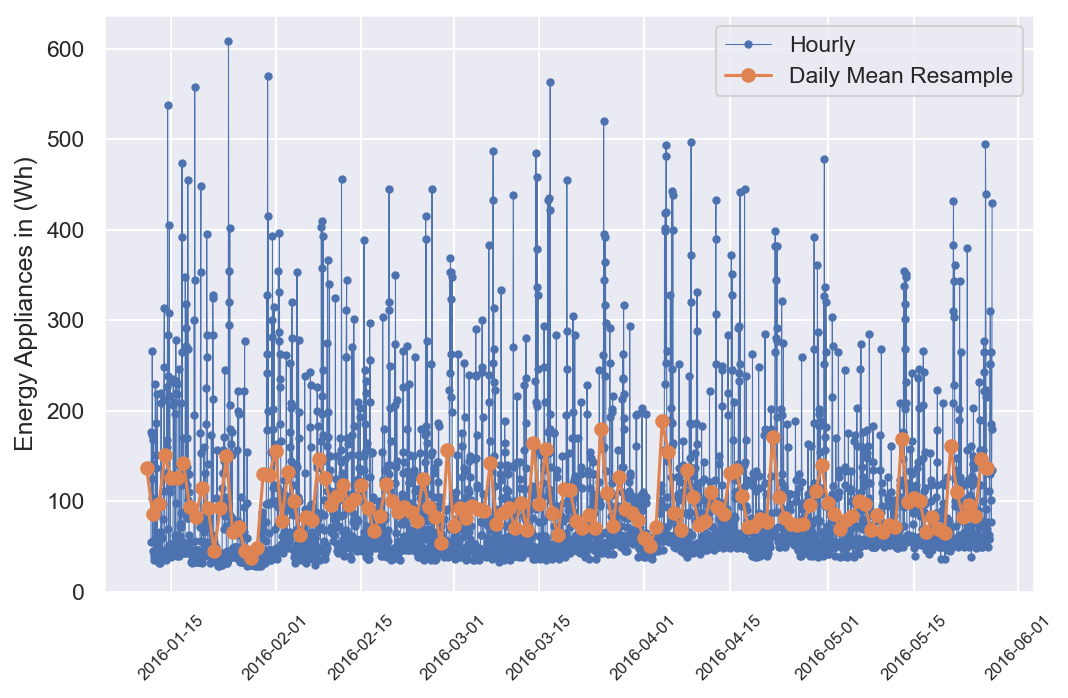

In [24]:
fig, ax = plt.subplots()
ax.plot(power_hourly_mean['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(power_daily_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Energy Appliances in (Wh)')
plt.xticks(rotation=45, fontsize=8)

ax.legend();

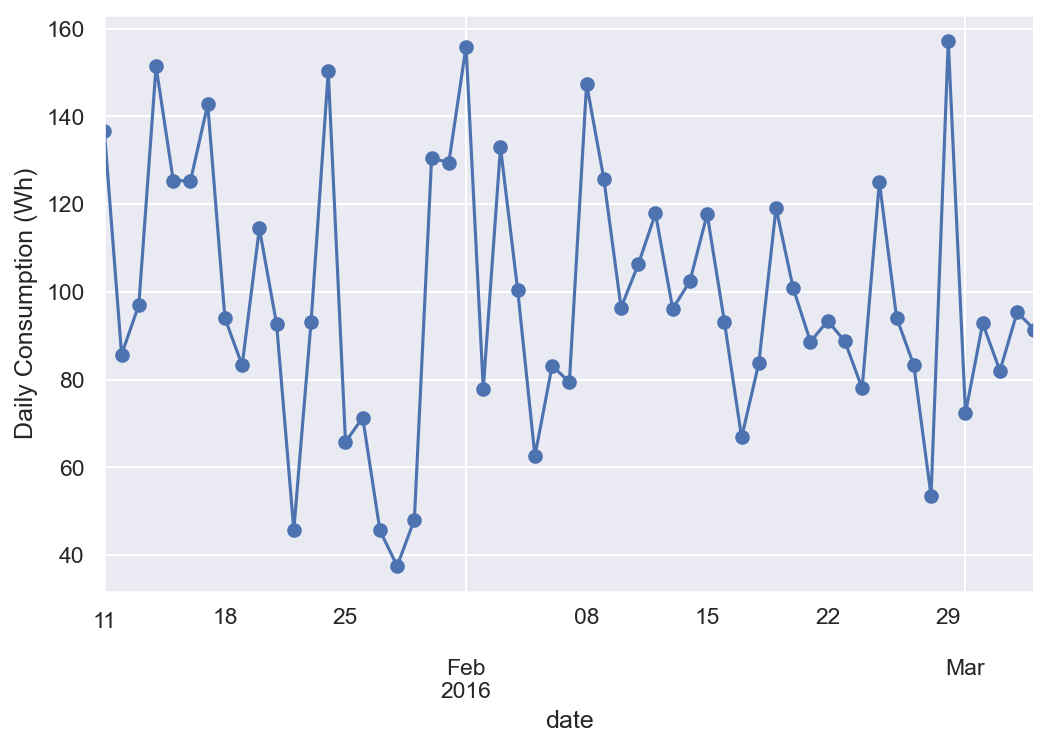

In [25]:
ax = power_daily_mean.loc['2016-01-11':'2016-03-05', 'Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (Wh)');

We can see the highest peaks of energy consumption are over 140 Wh. There is a significant fall in the last week of January from the 25th, also in February from the 26th, then it will have the highest peak on the 29th February. 


## Weekly average of Energy consumption 

In [26]:
power_weekly_mean = data.resample('W').mean()
power_weekly_mean

,Appliances
date,
2016-01-17,121.953642
2016-01-24,96.190476
2016-01-31,75.456349
2016-02-07,98.888889
2016-02-14,113.164683
2016-02-21,95.704365
2016-02-28,87.996032
2016-03-06,97.251984
2016-03-13,90.674603


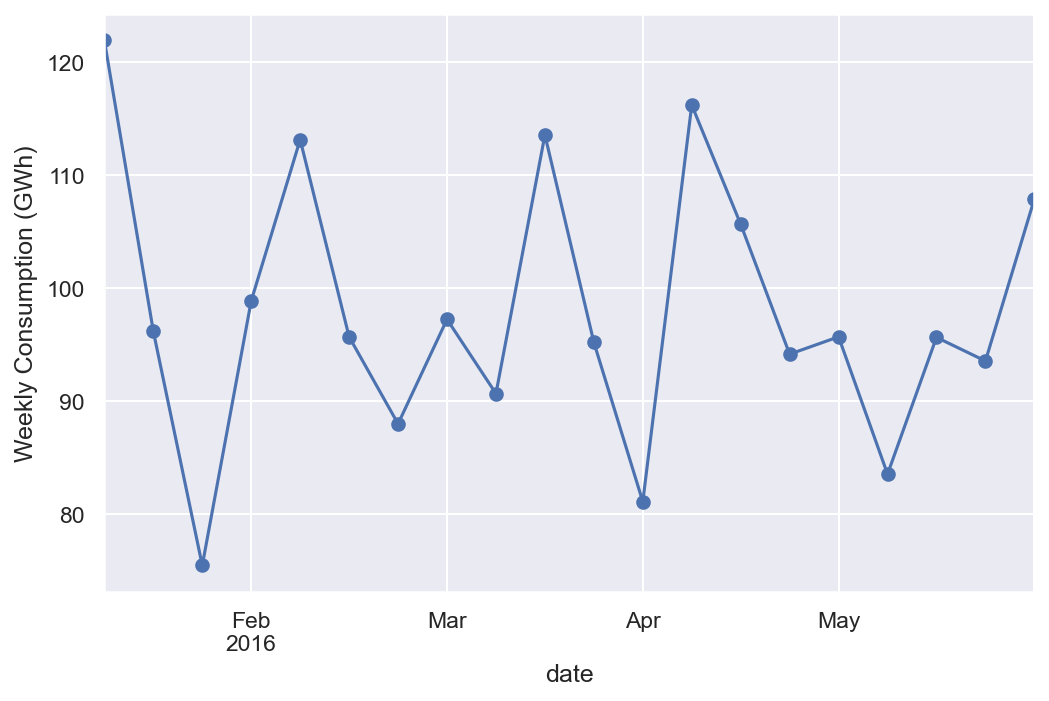

In [27]:
ax = power_weekly_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Weekly Consumption (GWh)');

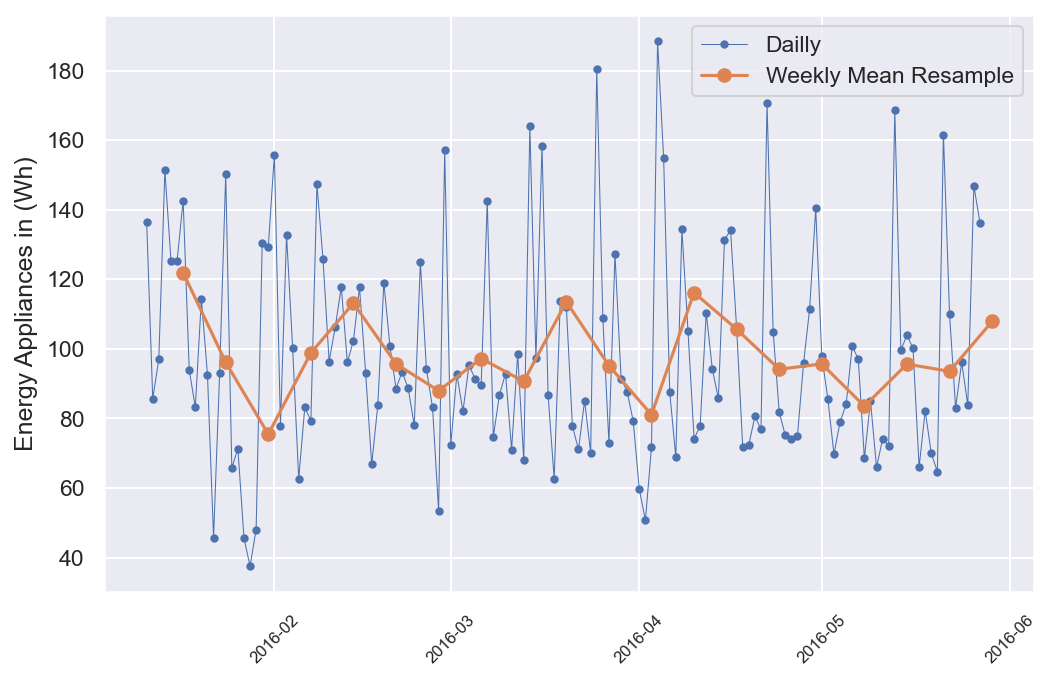

In [28]:
fig, ax = plt.subplots()
ax.plot(power_daily_mean['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Dailly')
ax.plot(power_weekly_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Energy Appliances in (Wh)')
plt.xticks(rotation=45, fontsize=8)

ax.legend();

The plot above shows the weekly mean time series versus the daily mean time series. We can see that the week mean data has a much smoother presentation the the daily mean one. 
The week mean time series has not presented an increase over time. 


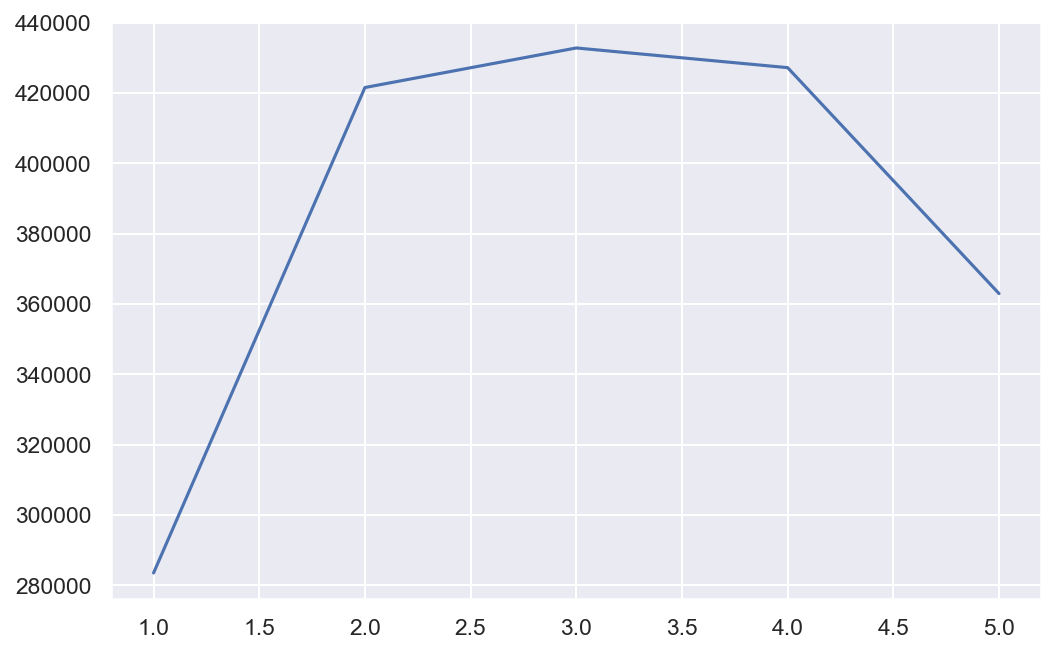

In [29]:
## Month Visualization 
ts_mes = data.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes);

### Decomposition

In order to see if the dataset has any seasonality and trend, it will be used the seasonal_decompose method from Statsmodels. 

The data will will be divided in three parts(trends, seasonal and residual).

trends - an increase or decrease in the data. 

seasonal - when the time series is affected by seasonal factors such as daily hour, week, month, year and so on. 

residual - they are the residuals/errors that have been left after trend and seasonality has been removed. 

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
# Decomposition
decomposition = seasonal_decompose(power_daily_mean)

In [32]:
#trend
trend = decomposition.trend
trend

date
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14    123.442460
2016-01-15    117.341270
                 ...    
2016-05-23    106.666667
2016-05-24    116.896389
2016-05-25           NaN
2016-05-26           NaN
2016-05-27           NaN
Freq: D, Name: trend, Length: 138, dtype: float64

In [33]:
#seasonal
seasonal = decomposition.seasonal
seasonal

date
2016-01-11    13.908858
2016-01-12   -10.037026
2016-01-13    -6.557180
2016-01-14   -10.154425
2016-01-15     6.151443
                ...    
2016-05-23    13.908858
2016-05-24   -10.037026
2016-05-25    -6.557180
2016-05-26   -10.154425
2016-05-27     6.151443
Freq: D, Name: seasonal, Length: 138, dtype: float64

In [34]:
#residual
residual = decomposition.resid
residual

date
2016-01-11          NaN
2016-01-12          NaN
2016-01-13          NaN
2016-01-14    38.100854
2016-01-15     1.854509
                ...    
2016-05-23   -37.519969
2016-05-24   -10.678807
2016-05-25          NaN
2016-05-26          NaN
2016-05-27          NaN
Freq: D, Name: resid, Length: 138, dtype: float64

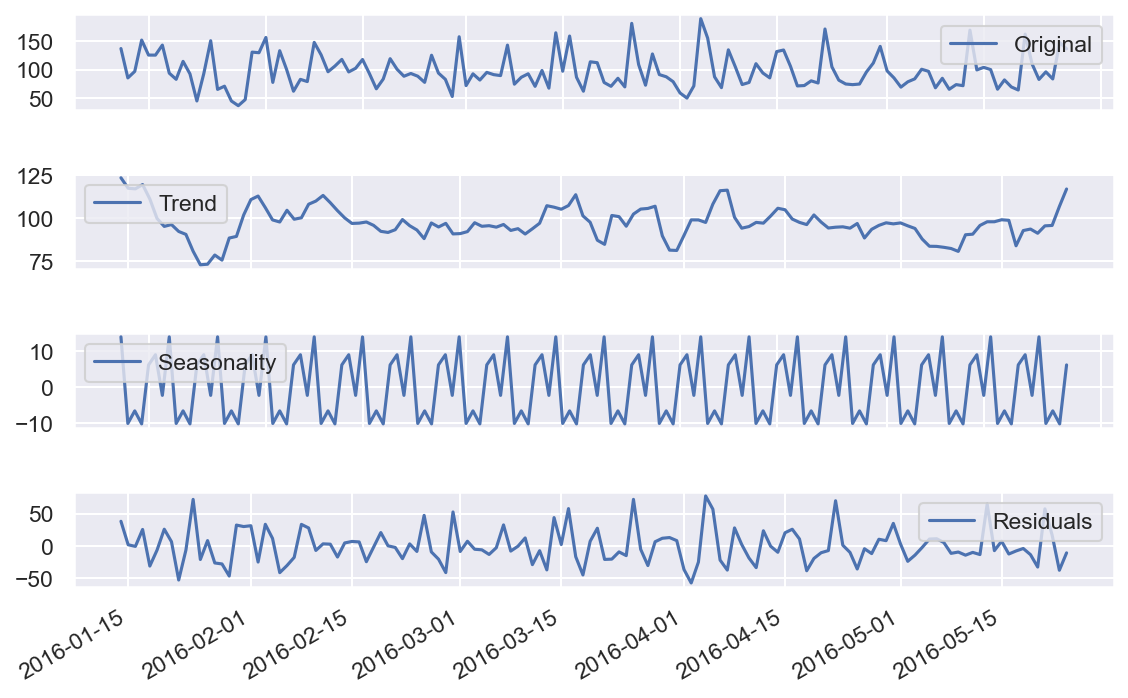

In [35]:
fig, ax = plt.subplots()

plt.subplot(4,1,1)
plt.plot(power_daily_mean, label = 'Original')
plt.legend(loc = 'best')

# Trend visualization 
plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

# Seasonality visualization
plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

# Residuals visualization 
plt.subplot(4,1,4)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()



fig.autofmt_xdate()

In the first plot we have the original power_daily_mean time series with all the components, we can see it presents some seasonality.  

Then in the second plot we can see clearly the trend of our daily time series without the seasonal element. 

In the third graph we have the seasonality element that was extrated from the observed data, we can see with more clarity the regular peaks patterns which in the original time serie was more difficult to be noticed.

Lastly, the plot with the residual element presents what has been left (errors) after the trend and seasonal elements extraction. These are the elements that do not fit on the trend or seasonality. 

A time series may not always have all these elements, it may have the seasonality or trend element only, but also neither of them.  



## AUTO-ARIMA 

It is an application of ARIMA, that make the search for the best values, combination of the ARIMA parameters (p, d, q) in order to perform predictions. 

AUTO-ARIMA is an automatic application that discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.

Auto-ARIMA works by conducting differencing tests (i.e.,
Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or
Phillips–Perron) to determine the order of differencing, ``d``, and then
fitting models within ranges of defined ``start_p``, ``max_p``,
``start_q``, ``max_q`` ranges. If the ``seasonal`` optional is enabled,
auto-ARIMA also seeks to identify the optimal ``P`` and ``Q`` hyper-
parameters after conducting the Canova-Hansen to determine the optimal
order of seasonal differencing, ``D``.


In [36]:
#import libraries to perform AUTO-ARIMA 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime


In [37]:
!pip install pmdarima
from pmdarima.arima import auto_arima

### Visualize the data 

In [38]:
power_daily_mean

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-05-23,83.055556
2016-05-24,96.180556
2016-05-25,83.888889


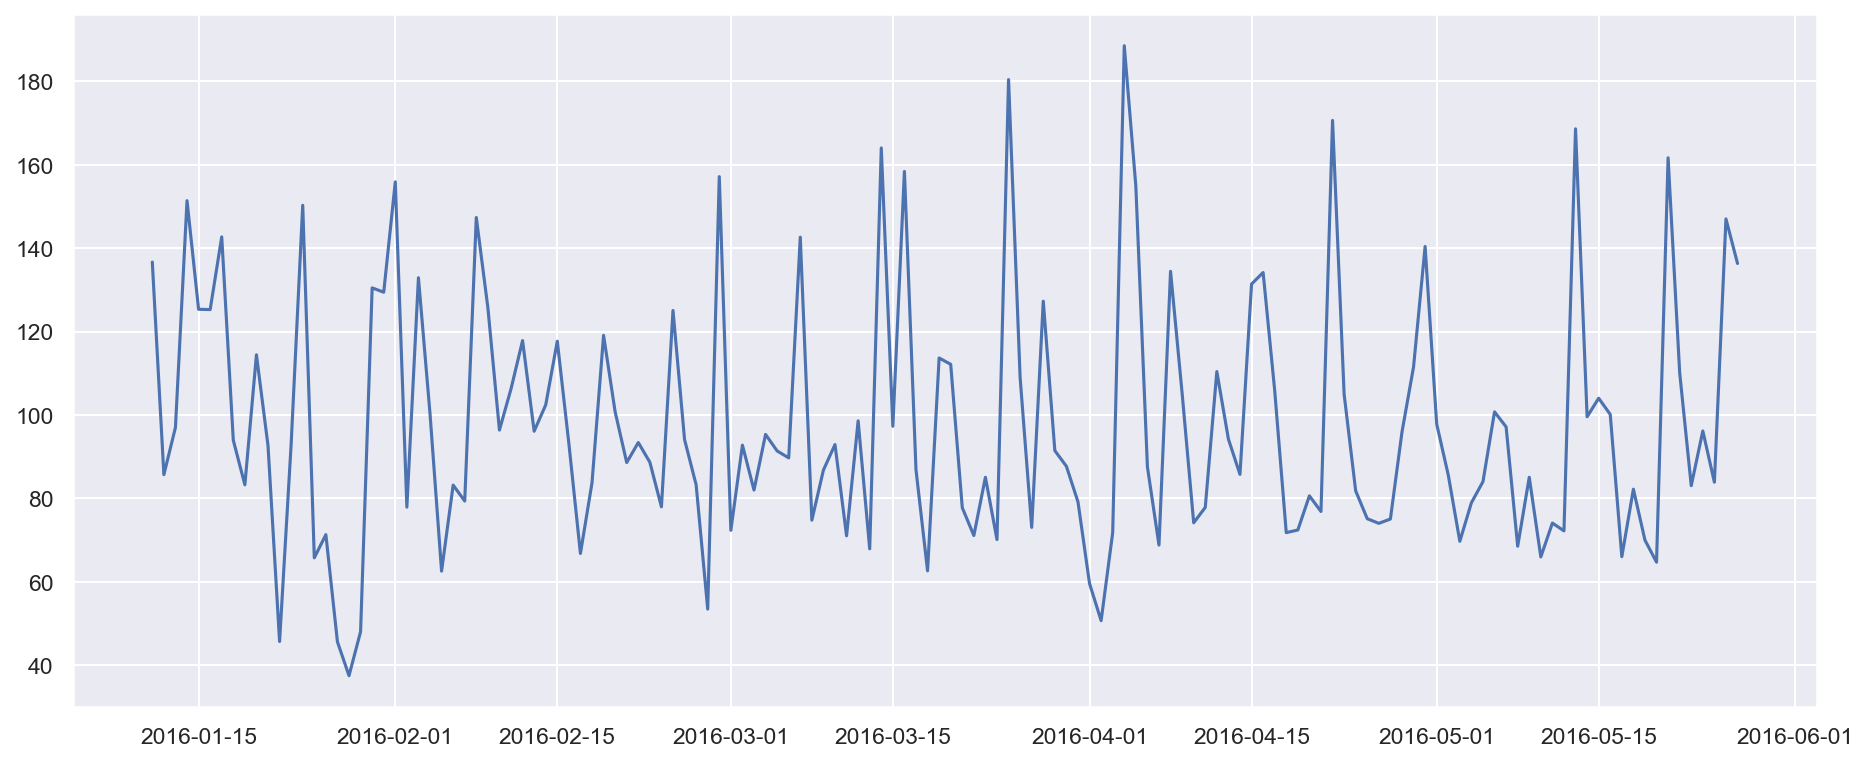

In [39]:
##Plot the data time series 
plt.plot(power_daily_mean);

### Set up AUTO-ARIMA 

Auto-ARIMA parameters: Some of the parameters has their default values

start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6

start_p : int, optional (default=2)
    The starting value of ``p``, the order (or number of time lags) of the auto-regressive ("AR") model. 

start_q : int, optional (default=2)
    The starting value of ``q``, the order of the moving-average

d : int, optional (default=None)
The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the ``test``(i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or the Phillips–Perron test will be conducted to find the most probable value).

m : int, optional (default=1) - 12  monthly data. 

max_p : int, optional (default=5)
The maximum value of ``p``, inclusive. Must be a positive integer greater than or equal to ``start_p``.

max_q : int, optional (default=5)
The maximum value of ``q``, inclusive. Must be a positive integer greater than ``start_q``.

Seasonal = True 

stepwise : bool, optional (default=True)
The stepwise algorithm can be significantly faster than fitting all (or a ``random`` subsetof) hyper-parameter combinations and is less likely to over-fit the model.

The AUTO-ARIMA will apply a stepwise search in order to find the best combination for ARIMA model with the parameters that have been set. 

In [40]:
## Set up Auto-ARIMA parameters 
stepwise_model = auto_arima(power_daily_mean, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1337.651, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1336.392, Time=0.21 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1337.262, Time=0.36 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1336.998, Time=0.58 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1337.553, Time=0.62 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1339.262, Time=0.75 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1337.315, Time=1.08 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1339.431, Time=1.41 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1344.022, Time=1.87 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1337.519, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1336.565, Time=0.25 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1337.154, Time=0.58 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1337.161, Time=0.36 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1337.793, Time=0.87 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1339.164, Time=1.16

The aim is to minimize the AIC. The lowest the AIC the better the model for make the predictions. 

In [41]:
# Stepwise = True 
print(stepwise_model.aic())

1334.281423309481


Althought the stepwise=True may be faster, it does not always present the best result. As we can see the lowest AIC is 1334.2814 when run with stepwise=False. 

#### stepwise = False - 1334.281423309481
#### Stepwise = True - 1336.3920014514579


## Training and Testing 

The training and test has been split as following: 

Train - data From beginning of January to 1st day of March 

Test - data from 2nd March to end of May the 27th. 



In [42]:
train = power_daily_mean.loc['2016-01-11':'2016-04-26']
test = power_daily_mean.loc['2016-04-27':]

train, test.shape

(            Appliances
 date                  
 2016-01-11  136.666667
 2016-01-12   85.694444
 2016-01-13   97.013889
 2016-01-14  151.388889
 2016-01-15  125.347222
 ...                ...
 2016-04-22  170.625000
 2016-04-23  105.000000
 2016-04-24   81.805556
 2016-04-25   75.138889
 2016-04-26   74.027778
 
 [107 rows x 1 columns],
 (31, 1))

In [43]:
#Visualize training data 
train

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-04-22,170.625000
2016-04-23,105.000000
2016-04-24,81.805556


In [44]:
#Visualize test data 
test

,Appliances
date,
2016-04-27,75.069444
2016-04-28,95.902778
2016-04-29,111.527778
2016-04-30,140.416667
2016-05-01,97.847222
2016-05-02,85.625000
2016-05-03,69.722222
2016-05-04,78.958333
2016-05-05,84.027778


### Fit the model 

The ARIMA model will be trained with the training data with the best combination that has been found by the AUTO-ARIMA application. 

In [45]:
#Fit the model 
stepwise_model.fit(train)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [46]:
#Set up predict with the same period of test data 
future_forecast = stepwise_model.predict(n_periods=31)

In [47]:
#Prediction - The prediction's results has been based on the test data (same period), that means we have predicted based on what happened already. 
future_forecast

2016-04-27     93.825734
2016-04-28     90.092699
2016-04-29     98.131920
2016-04-30    107.474592
2016-05-01    107.536642
2016-05-02    100.415223
2016-05-03    101.787462
2016-05-04     79.356670
2016-05-05     97.419242
2016-05-06    101.166896
2016-05-07    104.769464
2016-05-08    106.114971
2016-05-09     96.763180
2016-05-10     95.098202
2016-05-11     95.742168
2016-05-12     96.621231
2016-05-13     97.198249
2016-05-14     97.479534
2016-05-15     97.584940
2016-05-16     97.610543
2016-05-17     97.608842
2016-05-18     97.601992
2016-05-19     97.596786
2016-05-20     97.594018
2016-05-21     97.592879
2016-05-22     97.592545
2016-05-23     97.592517
2016-05-24     97.592565
2016-05-25     97.592610
2016-05-26     97.592637
2016-05-27     97.592649
Freq: D, dtype: float64

In [48]:
# Creating a dataframe with the predicted values 
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Appliances"])

### Evaluating the model 

The blue line is the period of energy consumption on the test data. 
The orange line is the AUTO-ARIMA model prediction.

We can see the AUTO-ARIMA model prediction has not performed well, the prediction line has barely similarity with the actual data. 

Perhaps the amount of data was not sufficient for the model to be able to generalize well. or we should try to change some of the AUTO-ARIMA parameters to see how the model performs again. 

<Axes: xlabel='date'>

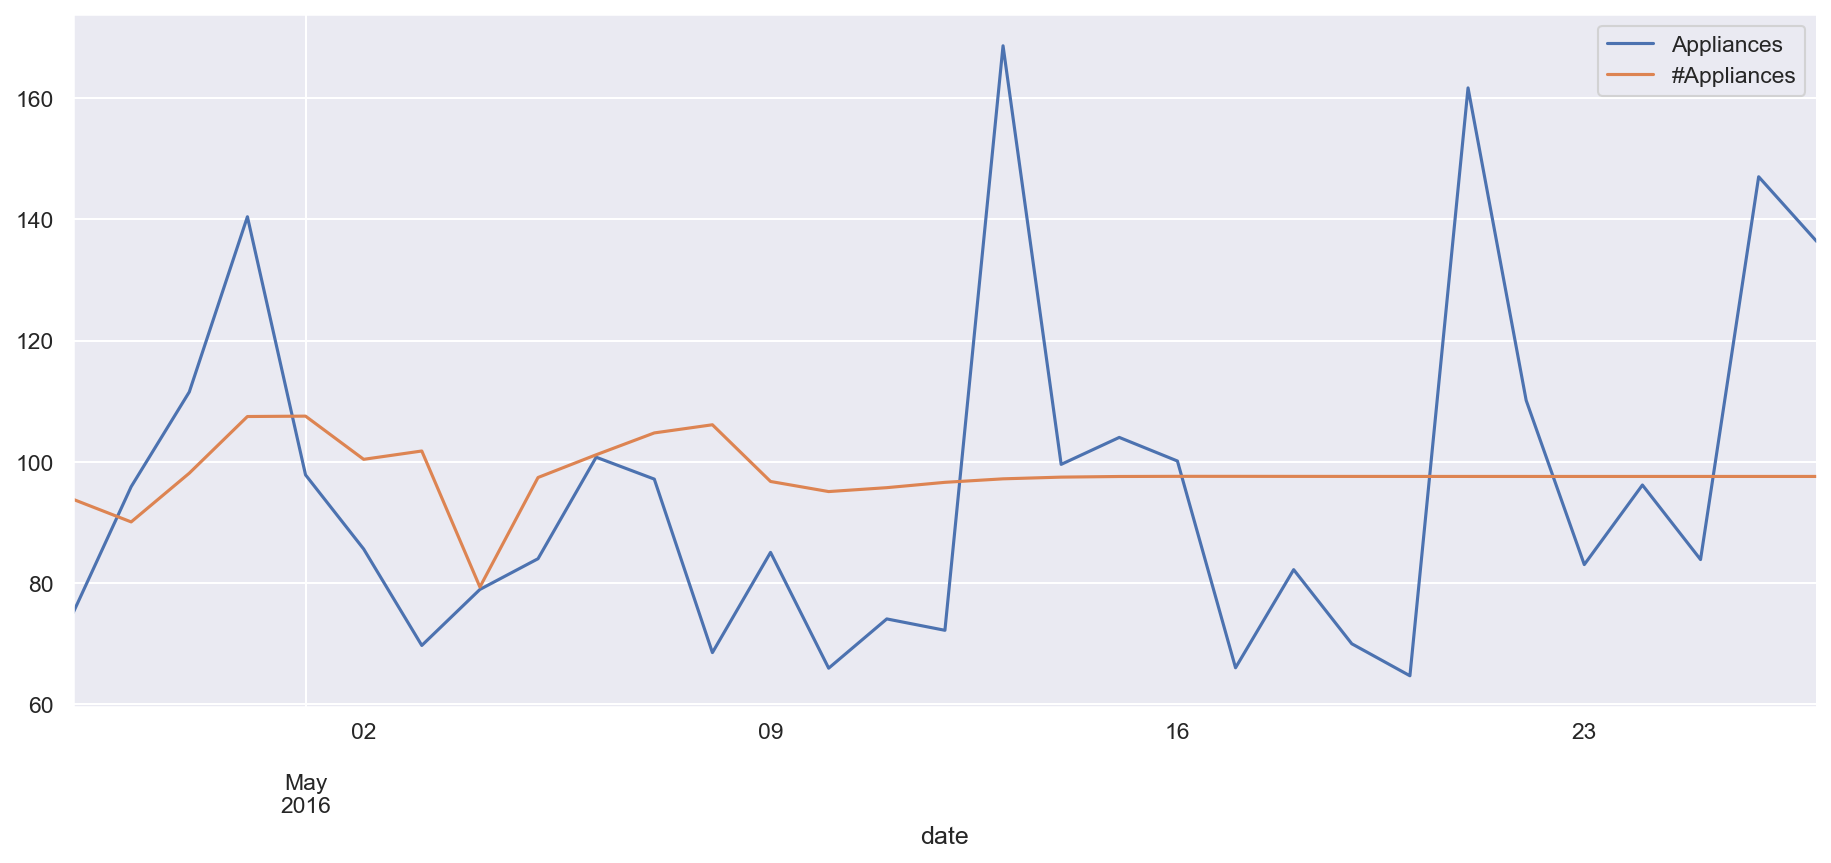

In [49]:
#Blue (test), Orange(prediction)
pd.concat([test,future_forecast],axis=1).plot()

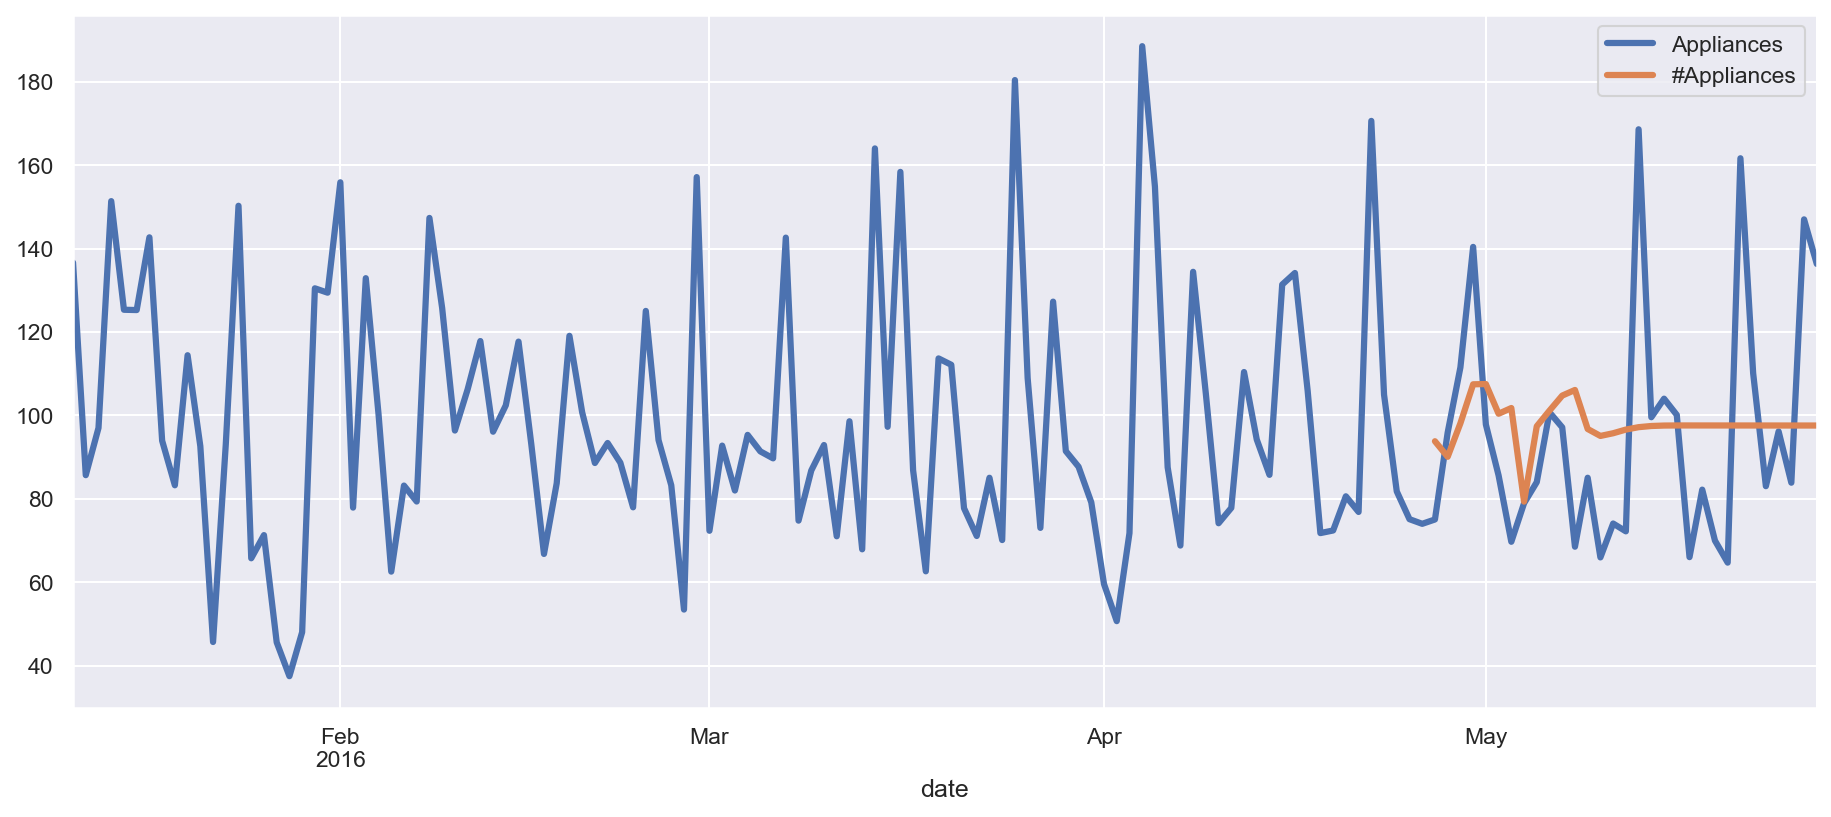

In [50]:
#Visualize the whole data time serie and the prediction performed by the model 
pd.concat([power_daily_mean,future_forecast],axis=1).plot(linewidth=3);

## Question2 
## Market Basket Analysis - using Association Rule Mining 

Association Rule mining is a technique of data mining used to find association between different items in a set, find frequent patterns in a transaction database, relational databases or any other information repository. We can see the association mining rules used in different fields such as Marketing, Market Basket Analysis, Clustering and Classification. 

Association rule = IF THIS  (Antecedent)
                - THEN THAT (Consequent)

Market Basket Analysis - Will use association mining rules on a given transaction to find out what are the items that customers buy more frequent, also what are the products that normally are bought together in the same transaction. 

Market Basket Analysis can be very helpful for businesses to get some insights about their customer behaviours, improve market strategies and product inventory, understand their key sales products, customize advertiments' email and changing store's layout according to some trends. 
(“R Market Basket Analysis Using Apriori Examples”). 


### Support 

Support -  Fraction of transactions that contain the item-set 'X'. Putting simply it is the P(AUB) is the probability of A and B occurring together. P denotes probability

Support(X)=\frac{frequency(X)}{N}

For a Rule A=>B, Support is given by:

Support(A=>B)=\frac{frequency(A,B)}{N} - Number of transactions contained the itemset, divided by the total number of transactions. 


### Confidence 

Confidence - Probability that item B is bought due to the purchase of item A. 
    
For a rule A=>B Confidence shows the percentage in which B is bought with A.

Confidence(A=>B)=\frac{P(A\cap B)}{P(A)}=\frac{frequency(A,B)}{frequency(A)} - Number of transactions with both A and B divided by the total number of transactions having A.



Because Support and Confidence are probabilities, they will range from [0,1]



In [51]:
!pip install mlxtend

In [52]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv

### Loading the data

In [53]:
grocery_items = set()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,whisky,honey,domestic eggs,other vegetables,organic products,flour,white bread,rum,bags,specialty fat,...,skin care,specialty vegetables,tea,margarine,toilet cleaner,popcorn,meat,bottled water,roll products,beef
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
grocery.shape

(9835, 169)

In [55]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, whisky to beef
dtypes: int64(169)
memory usage: 12.7 MB


In [56]:
grocery.columns = grocery.columns.str.replace(',', '_')

In [57]:
grocery.columns.tolist()

['whisky',
 'honey',
 'domestic eggs',
 'other vegetables',
 'organic products',
 'flour',
 'white bread',
 'rum',
 'bags',
 'specialty fat',
 'jam',
 'pudding powder',
 'whipped/sour cream',
 'specialty chocolate',
 'softener',
 'baby food',
 'tidbits',
 'frozen dessert',
 'newspapers',
 'cake bar',
 'hygiene articles',
 'hamburger meat',
 'preservation products',
 'chocolate marshmallow',
 'chicken',
 'canned fruit',
 'semi-finished bread',
 'hair spray',
 'chocolate',
 'sugar',
 'curd cheese',
 'potato products',
 'rice',
 'canned beer',
 'sauces',
 'frozen vegetables',
 'turkey',
 'specialty bar',
 'Instant food products',
 'syrup',
 'root vegetables',
 'ham',
 'liquor (appetizer)',
 'onions',
 'sliced cheese',
 'cream cheese ',
 'salty snack',
 'long life bakery product',
 'kitchen utensil',
 'butter',
 'prosecco',
 'misc. beverages',
 'bathroom cleaner',
 'soups',
 'kitchen towels',
 'liqueur',
 'specialty cheese',
 'pot plants',
 'frozen potato products',
 'frankfurter',
 'dog f

### Visualize top sold items

In [58]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


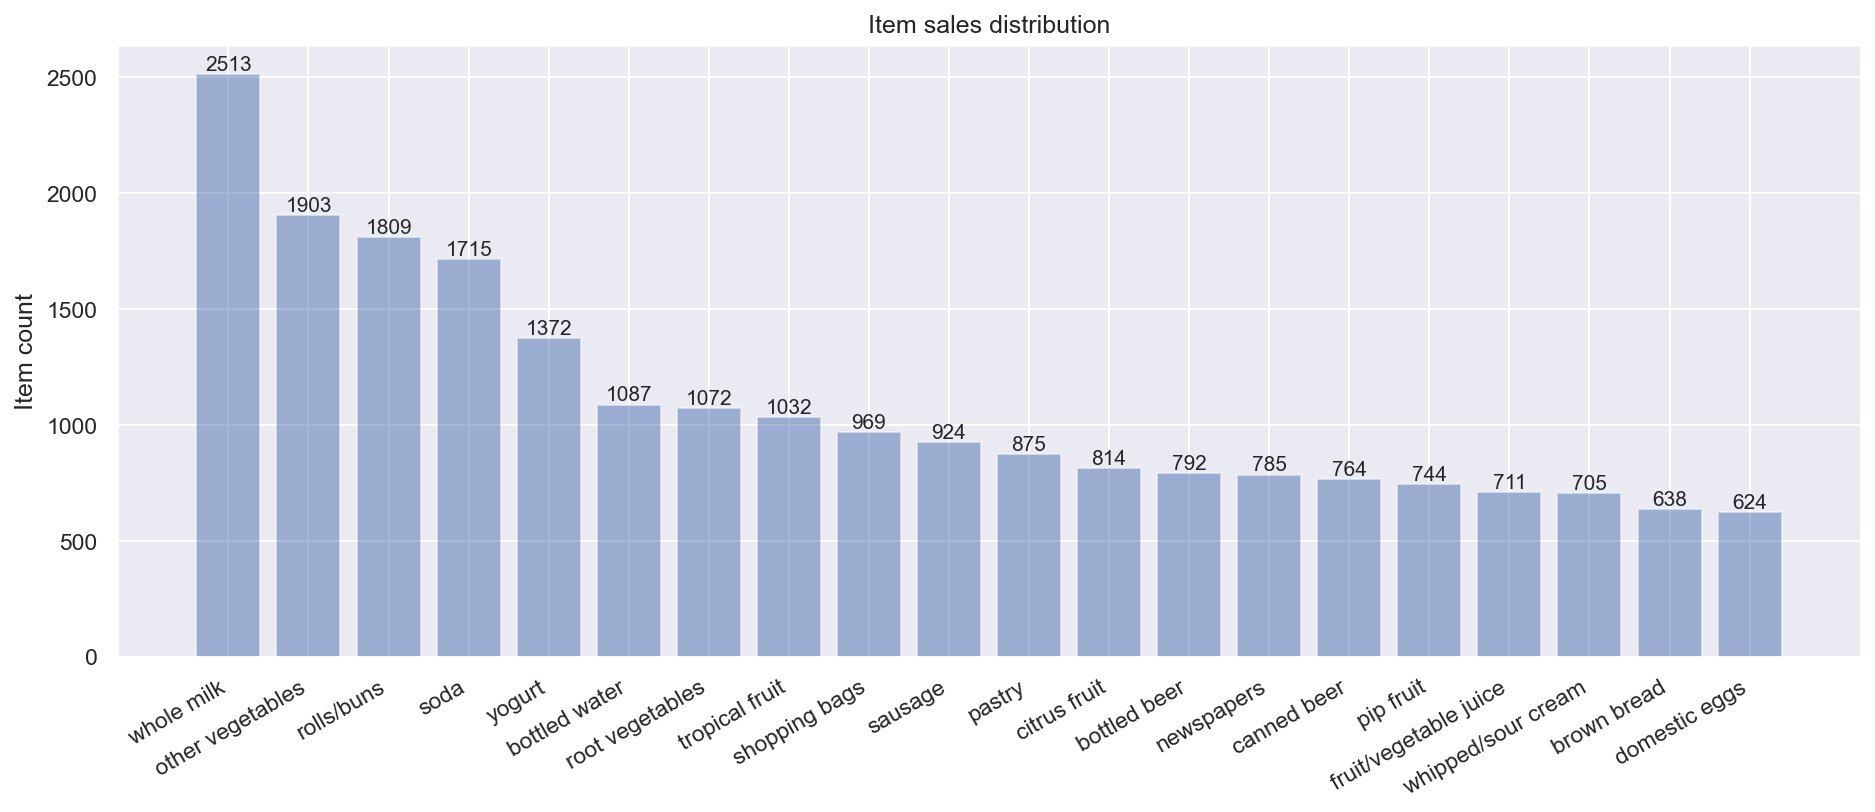

In [59]:
objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

fig, ax = plt.subplots()
bars = ax.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

ax.bar_label(bars, fontsize=10)

fig.autofmt_xdate()

plt.show()



In [60]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
less_popular = grocery.sum().sort_values(ascending = True).reset_index()
less_popular.rename(columns={less_popular.columns[0]:'item_name',less_popular.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(less_popular.head(20))

Total Item :  43367

Item Summary:
                item_name  item_count
0    sound storage medium           1
1               baby food           1
2   preservation products           2
3         kitchen utensil           4
4                    bags           4
5          frozen chicken           6
6          baby cosmetics           6
7          toilet cleaner           7
8         make up remover           8
9                  whisky           8
10         salad dressing           8
11                liqueur           9
12        rubbing alcohol          10
13             hair spray          11
14          frozen fruits          12
15                  cream          13
16                  honey          15
17            decalcifier          15
18       organic products          16
19   specialty vegetables          17


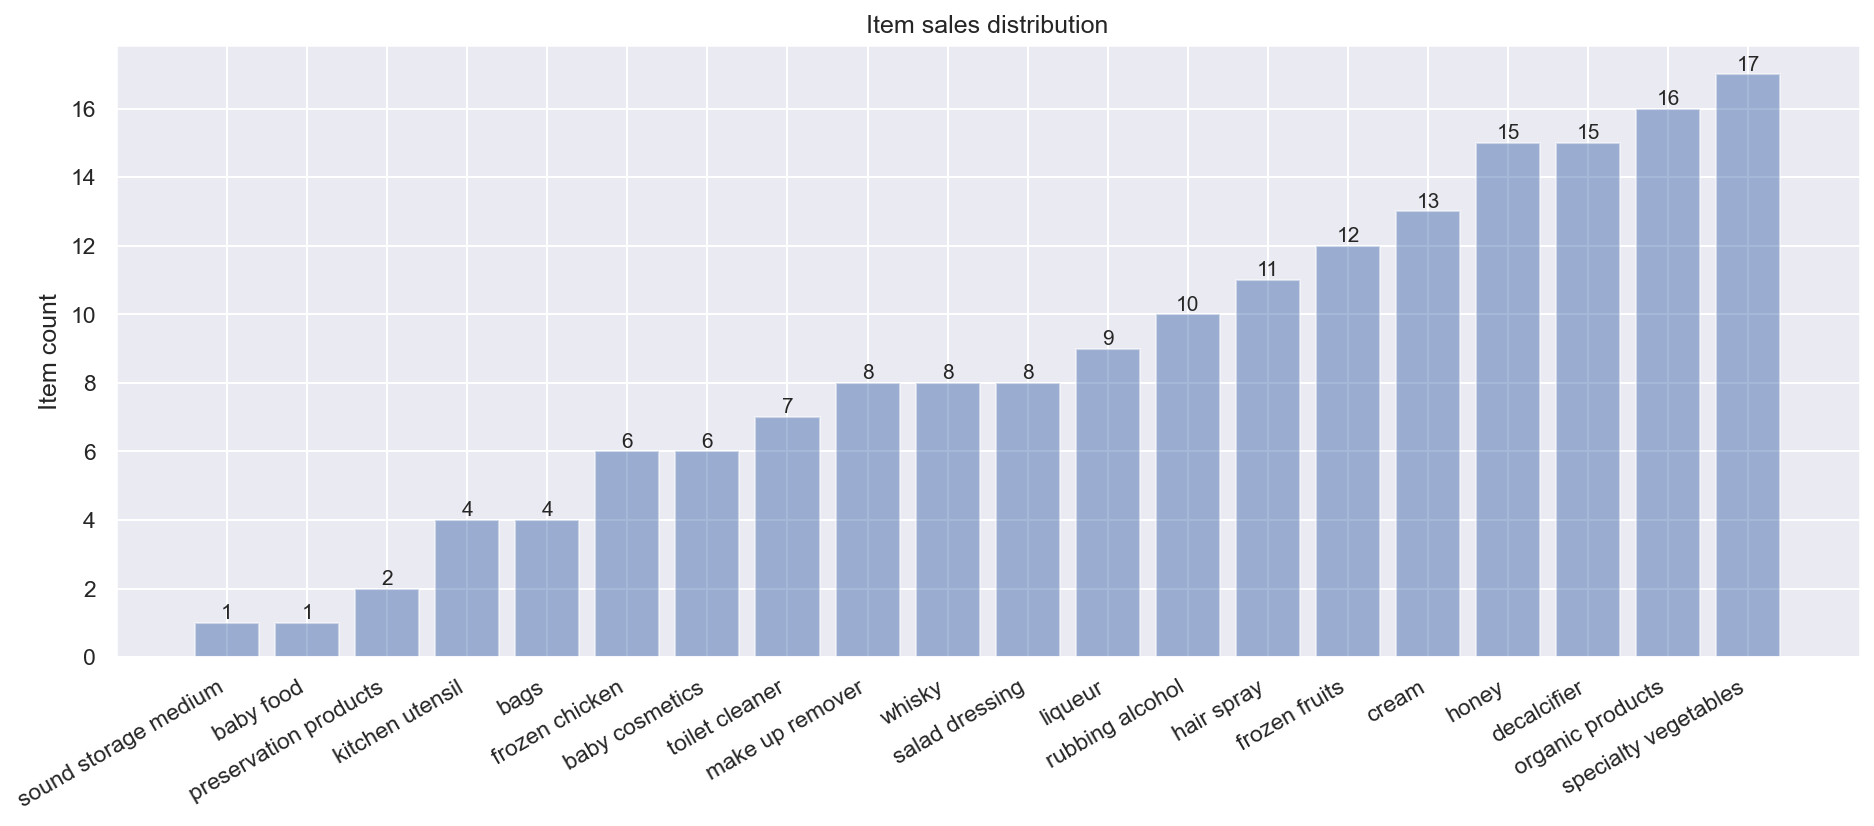

In [61]:
objects = (list(less_popular['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(less_popular['item_count'].head(n=20))

fig, ax = plt.subplots()
bars = ax.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

ax.bar_label(bars, fontsize=10)

fig.autofmt_xdate()

plt.show()


### Apriori Algorithm, Generating frequent itemsets 

Frequent Itemsets: Item-sets whose support is greater or equal than minimum support threshold (min_sup). 

I have used the default parameter of the Apriori algorithm for min_support which is equal to 0.5 and I have gotten the following results: 

The min_support will vary and be chosen according to business needs and goals. 

In [62]:
frequent_itemsets = apriori(grocery, min_support=0.01, use_colnames=True)

frequent_itemsets.head(10)

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.063447,(domestic eggs)
1,0.193493,(other vegetables)
2,0.017387,(flour)
3,0.042095,(white bread)
4,0.071683,(whipped/sour cream)
5,0.030402,(specialty chocolate)
6,0.010778,(frozen dessert)
7,0.079817,(newspapers)
8,0.013218,(cake bar)
9,0.032944,(hygiene articles)


In [63]:
print("Number of frequent_itemsets: {}".format(frequent_itemsets.shape[0]))

Number of frequent_itemsets: 333


### The dataframe below show us in the extra column the size of the item set (in other words, how many items are in the set): 

In [64]:
frequent_itemsets['length'] = \
(frequent_itemsets['itemsets'].apply(lambda x: len(x)))
frequent_itemsets.head()

,support,itemsets,length
0,0.063447,(domestic eggs),1
1,0.193493,(other vegetables),1
2,0.017387,(flour),1
3,0.042095,(white bread),1
4,0.071683,(whipped/sour cream),1


### In this dataframe contains all the itemsets with a lenght of 2 and with support in a specific range : [0.02, 0.021]

We can specify a range instead come up with a specific value when defining Support, because we can choose a spefic value that may not have any item-sets. 

In [65]:
lenght2 = frequent_itemsets[(frequent_itemsets['length'] == 2) \
                         & (frequent_itemsets\
                            ['support'] >= 0.02) \
                         & (frequent_itemsets\
                            ['support'] < 0.021)]

lenght2

,support,itemsets,length
109,0.020031,"(other vegetables, butter)",2
142,0.020742,"(yogurt, whipped/sour cream)",2
167,0.020437,"(whole milk, frozen vegetables)",2
201,0.020539,"(whole milk, frankfurter)",2
219,0.020437,"(bottled beer, whole milk)",2
245,0.020437,"(tropical fruit, pip fruit)",2
250,0.020844,"(tropical fruit, soda)",2
268,0.020946,"(pastry, rolls/buns)",2


### Plot the Support values

We can see that there are not support values less than 0.01 which was the min_support value parameter set up above. 

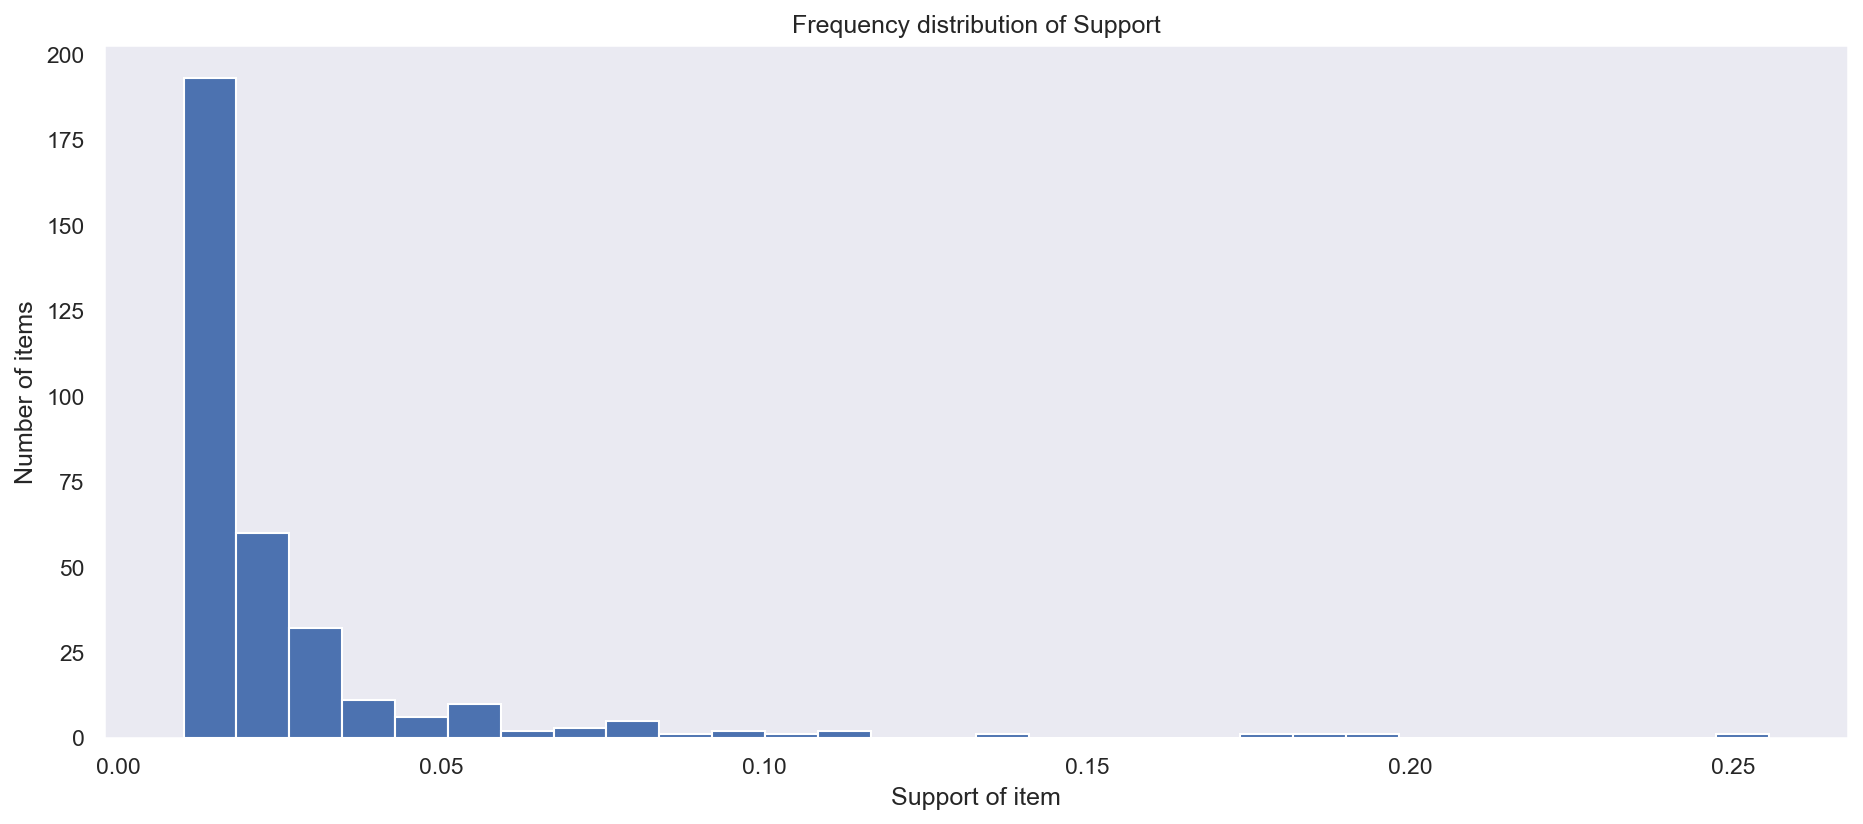

In [66]:
frequent_itemsets.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

### Generating rules 

If a rule A=>B[Support, Confidence] satisfies min_sup and min_confidence then it is a strong rule. 

In [67]:
tati_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [68]:
tati_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(domestic eggs),(other vegetables),0.063447,0.193493,0.022267,0.350962,1.813824,0.009991,1.242619,0.479074
1,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649
2,(white bread),(other vegetables),0.042095,0.193493,0.013726,0.326087,1.685268,0.005581,1.196753,0.424491
3,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
4,(hamburger meat),(other vegetables),0.033249,0.193493,0.013828,0.415902,2.149447,0.007395,1.380774,0.553156


In [69]:
print("Number of Associations: {}".format(tati_rules.shape[0]))

Number of Associations: 125


In [70]:
tati_rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

In [71]:
tati_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(domestic eggs),0.108998,0.063447,0.014337,0.131530,2.073071,0.007421,1.078394,0.580946
1,(domestic eggs),(root vegetables),0.063447,0.108998,0.014337,0.225962,2.073071,0.007421,1.151108,0.552690
2,(other vegetables),(whipped/sour cream),0.193493,0.071683,0.028876,0.149238,2.081924,0.015006,1.091160,0.644352
3,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
4,(other vegetables),(hamburger meat),0.193493,0.033249,0.013828,0.071466,2.149447,0.007395,1.041159,0.663062


In [72]:
print("Number of Associations: {}".format(tati_rules2.shape[0]))

Number of Associations: 160


The number of association rules found using the lift metric with the minimum threshold value of 0.2 is 618, which is a higher value when compared to the confidence metric which has a number of association rules of 234. 

In [73]:
tati_rules[(tati_rules['lift'] >= 2) & (tati_rules['confidence'] >=0.5)]  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
69,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
76,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
78,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
79,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
80,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
84,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
98,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,0.519843
103,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
112,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
113,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627


#print(grocery['whole milk'].sum())
#print(grocery['pip fruit, other vegetables'].sum())

### A=>B[Support,Confidence]

The part before $=>$all is referred to as if (Antecedent) and the part after $=>$ is referred to as then (Consequent).

Where A and B are sets of items in the transaction data. A and B are disjoint sets.

Example: whole milk => yougurt [Support=20\%, confidence=60\%]


20% transaction show yogurt is bought with purchase of a whole milk

60% of customers who purchase yogurt is bought with purchase of whole milk 

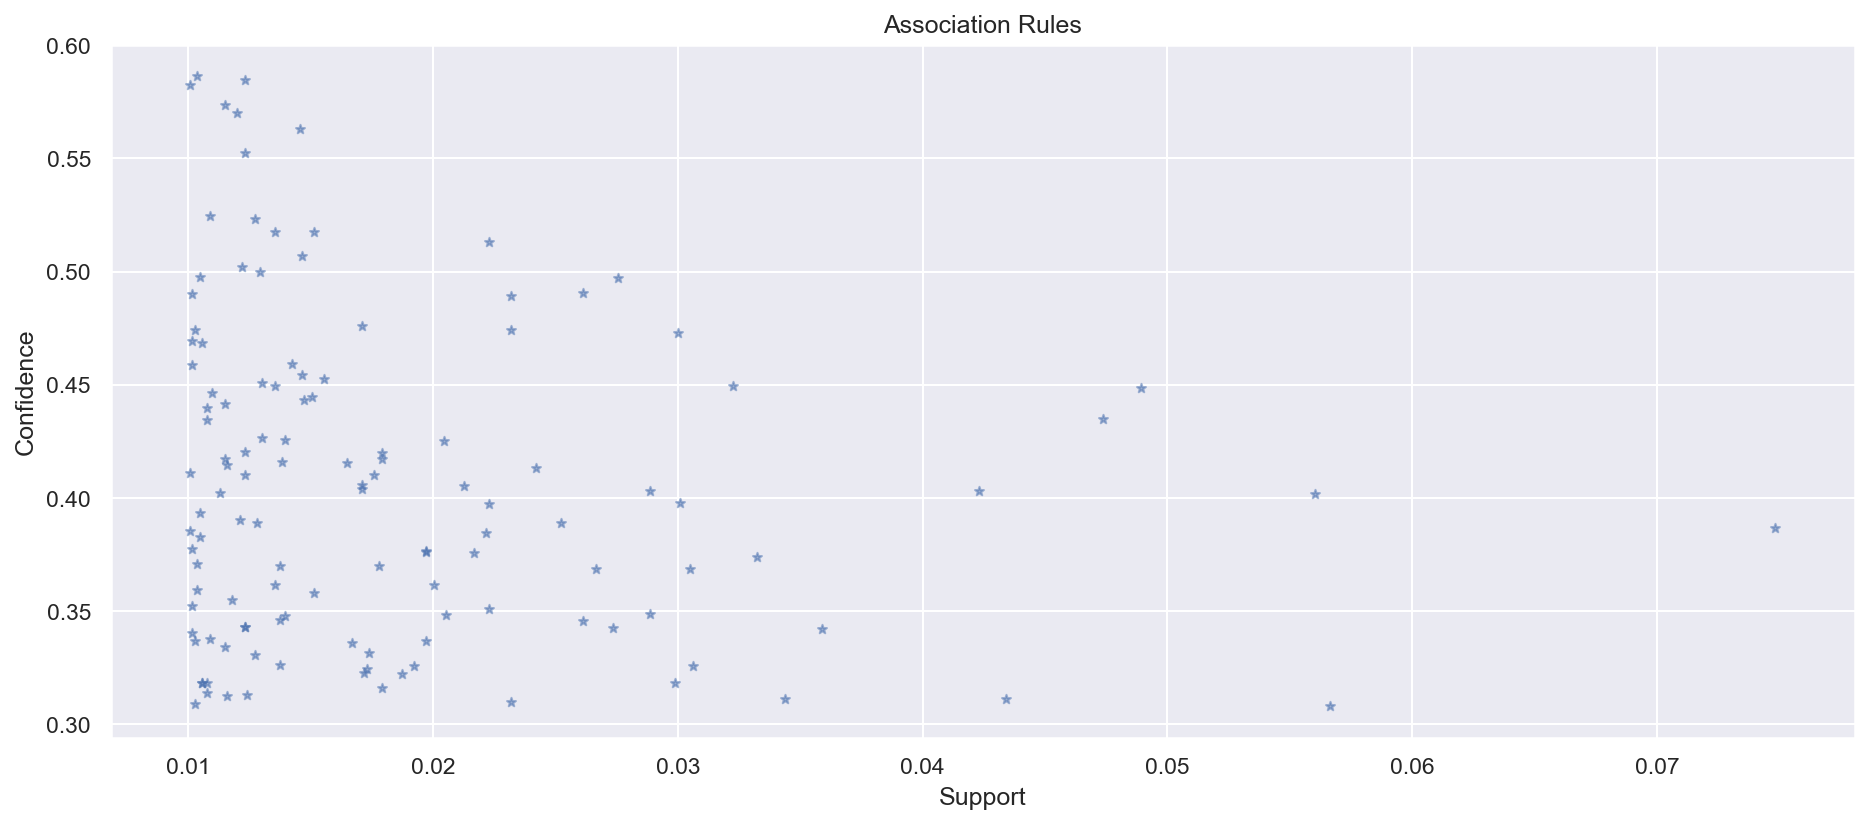

In [74]:
tati_rules.plot.scatter("support", "confidence", \
                   alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

Notice that there are no association rules with both extremely high confidence and extremely high support.

If an item set has high support, the items are likely to appear with many other items, making the chances of high confidence very low. (Johnston et al.)

### Plot Confidence distribution 

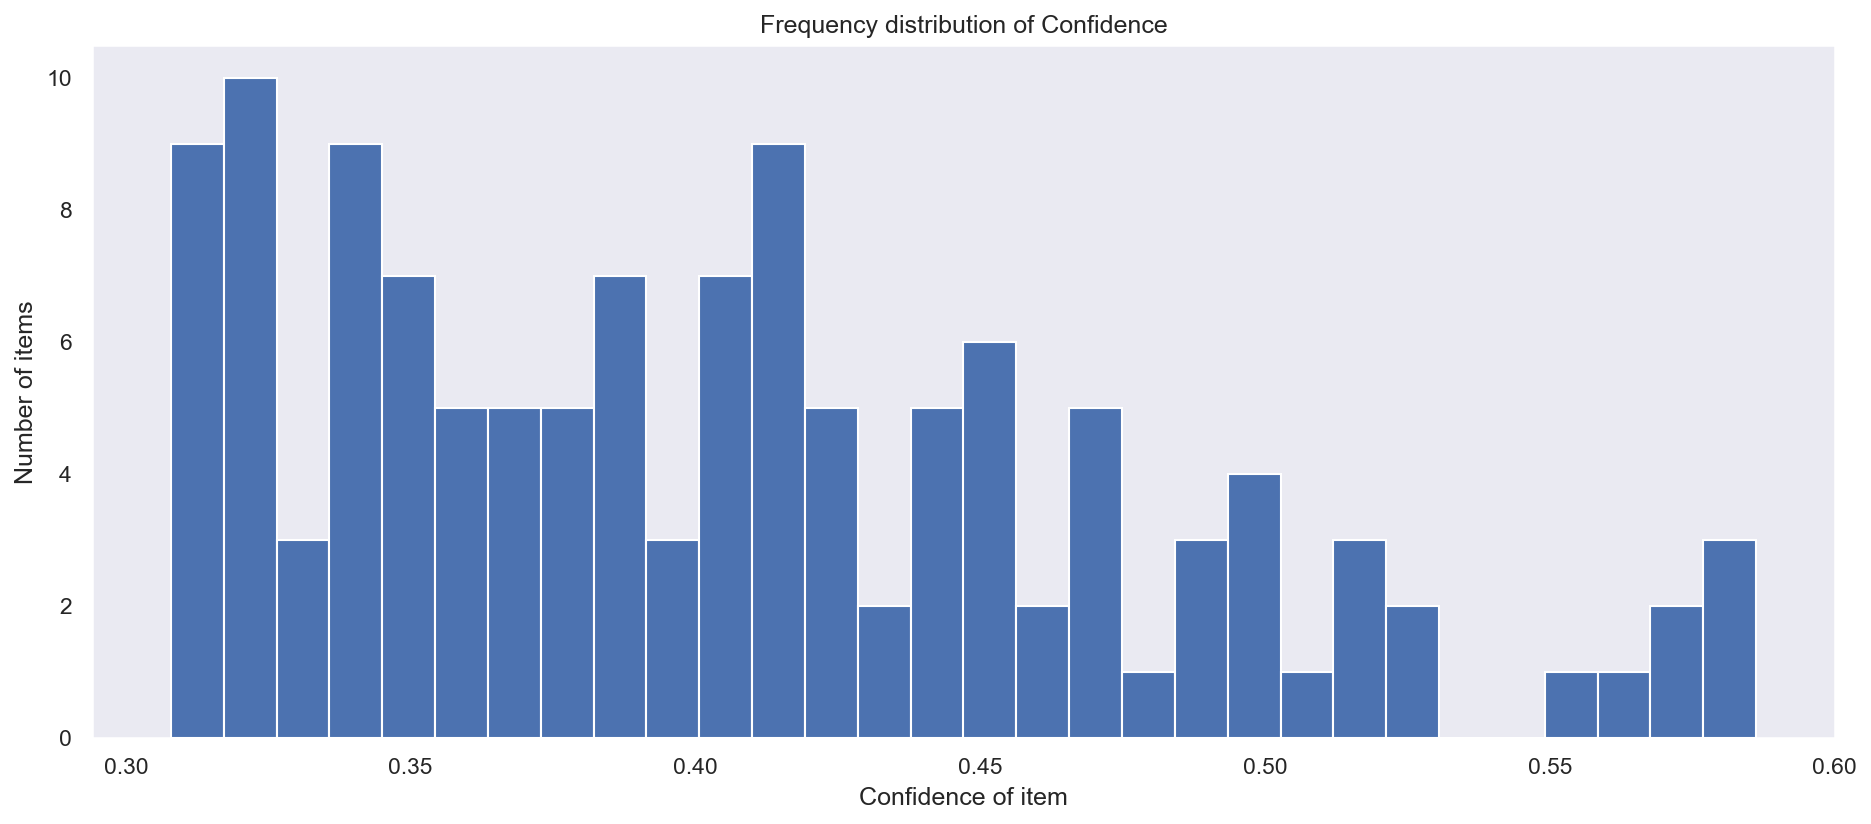

In [75]:
tati_rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

### Lift and average

Is there a link between two items or not ? 
What kind of link, correlation is that? 

### Lift
The values of the metrics measure the degree and orientation (in other words, positive or negative) of the relationship between the items. 

A value of lift other than 1 means that some dependency exists between the items. When the value is greater than 1, the second item is more likely to be purchased if the first item is purchased. Likewise, when the value is less than 1, the second item is less likely to be purchased if the first item is purchased. 

If the lift value is 0.1, we could say that the relationship between the two items is strong in the negative direction. 

A lift of 1 indicates that the products are independent of one another.

A positive leverage (greater than 0) suggests that the items tend to occur together more frequently than expected, indicating a positive association. On the other hand, a negative leverage (less than 0) suggests that the items tend to occur together less frequently than expected, indicating a negative association or avoidance.

# Average
The results ranges from -1 to 1. It calculates the difference between the two cases. 

When average is = 0, (It's equal to lift = 1), that means the two items are independent, therefore there are no correlation between item A and B when they are purchased together. 

### Plot Lift distribution 

We can see that there are less data points after 2.5 value. 

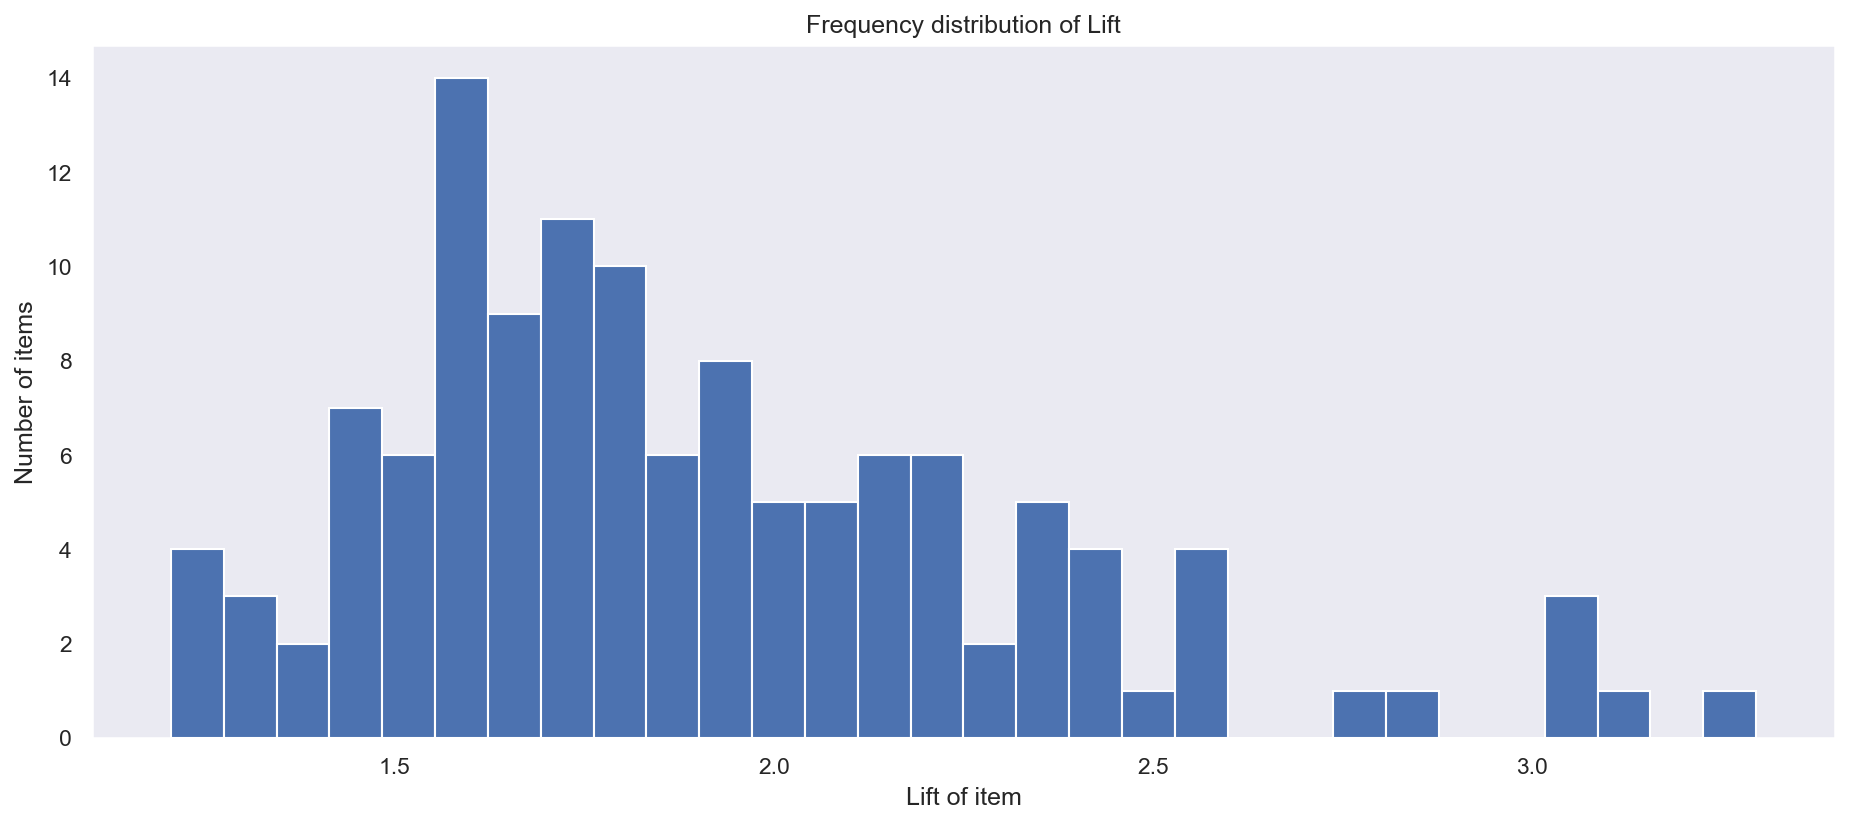

In [76]:
tati_rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")



plt.show()

### Plot Leverage distribution

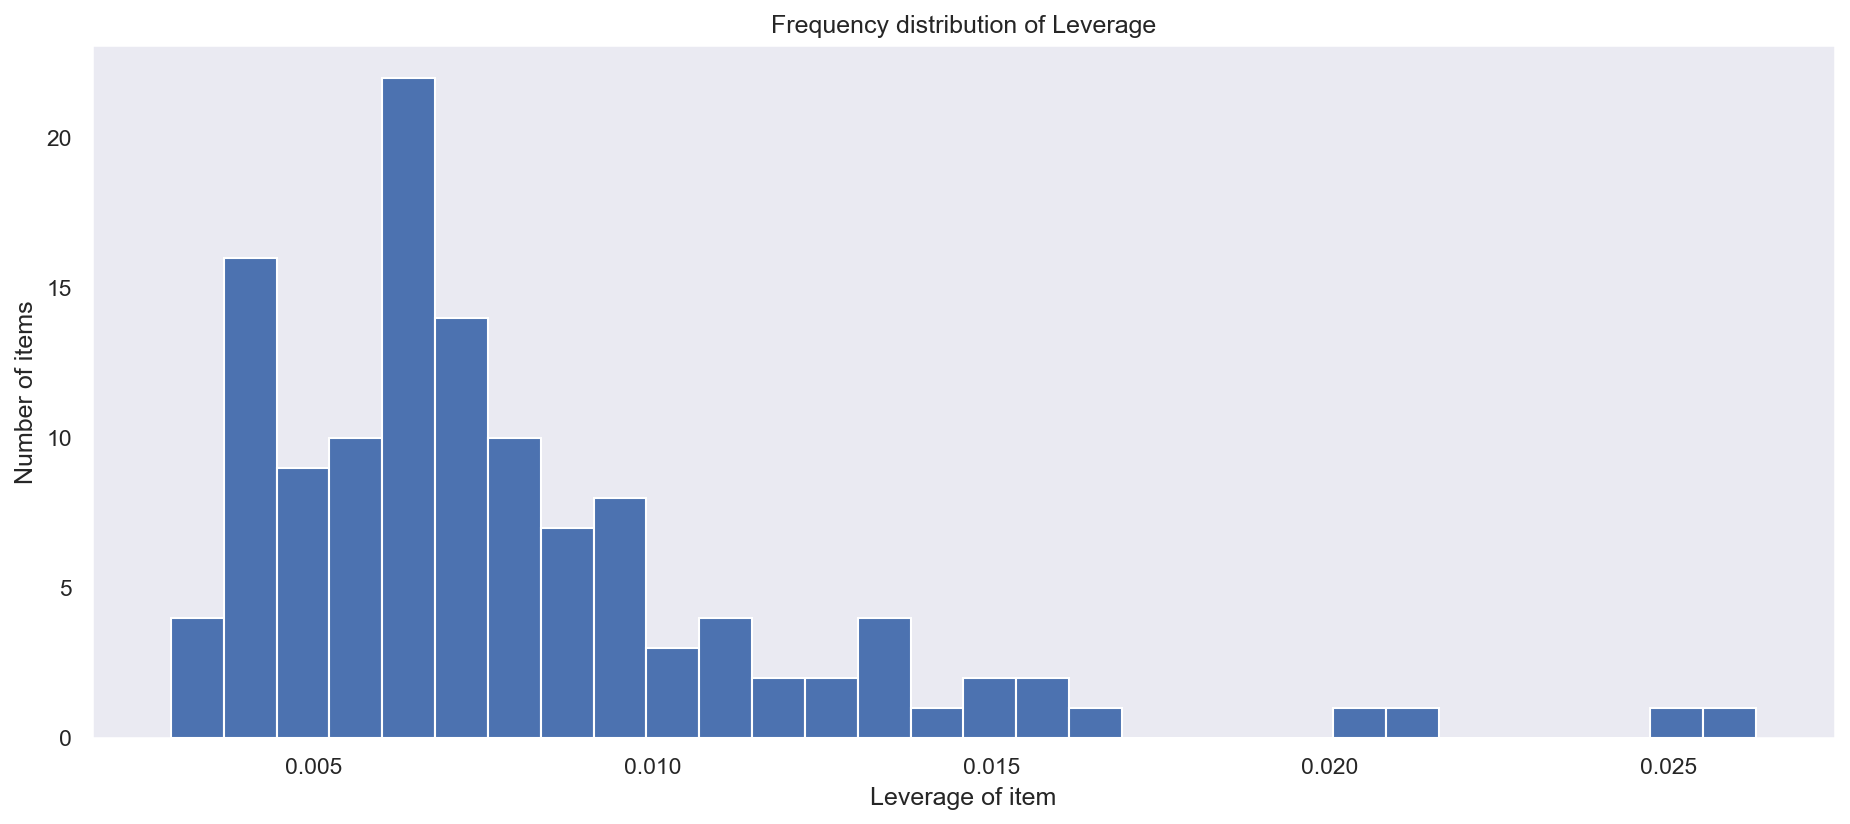

In [77]:
tati_rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

In [78]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Start timing
start_time = time.time()

# Calculate the frequent itemsets by calling the apriori method
frequent_itemsets_ap = apriori(grocery, min_support=0.01, use_colnames=True)

# Calculate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)

# End timing
end_time = time.time()

# Calculate the time taken
calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules calculated in 1.03 seconds.


### FP Growth Algorithm 

The FP-Growth (Frequent Pattern Growth) algorithm is another popular algorithm for association rule mining. It works by constructing a tree-like structure called a FP-tree, which encodes the frequent itemsets in the dataset. The FP-tree is then used to generate association rules in a similar manner to the Apriori algorithm. The FP-Growth algorithm is generally faster than the Apriori algorithm, especially for large datasets. (Ali)

In [79]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [80]:
# Evaluate the frequent item rules for fpgrowth function
frequent_items2 = fpgrowth(grocery, min_support = 0.01, use_colnames = True)

print(frequent_items2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                         itemsets
0    0.082766                   (citrus fruit)
1    0.058566                      (margarine)
2    0.017692            (semi-finished bread)
3    0.139502                         (yogurt)
4    0.104931                 (tropical fruit)
..        ...                              ...
328  0.010168  (frozen vegetables, rolls/buns)
329  0.012405      (yogurt, frozen vegetables)
330  0.014235       (other vegetables, onions)
331  0.012100             (whole milk, onions)
332  0.010778      (sliced cheese, whole milk)

[333 rows x 2 columns]


In [81]:
print("Number of frequent_items2: {}".format(frequent_items2.shape[0]))

Number of frequent_items2: 333


In [82]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_items2, metric = "confidence", min_threshold = 0.3)

rules_fp1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
1,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674,0.485603
2,"(whole milk, citrus fruit)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,0.006014,1.297233,0.604064
3,"(yogurt, citrus fruit)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,0.004736,1.415849,0.471348
4,"(other vegetables, citrus fruit)",(whole milk),0.028876,0.255516,0.013015,0.450704,1.763898,0.005636,1.355343,0.445951


In [83]:
print("Number of Associations: {}".format(rules_fp1.shape[0]))

Number of Associations: 125


In [84]:
print(grocery['whole milk'].sum())
print(grocery['citrus fruit'].sum())
print(grocery['other vegetables'].sum())

2513
814
1903


In [85]:
# Display the reles due to fp-growth algorithm
rules_fp2 = association_rules(frequent_items2, metric = "lift", min_threshold = 2)

rules_fp2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280,0.630358
1,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,0.011244,1.178942,0.615125
2,"(whole milk, yogurt)",(citrus fruit),0.056024,0.082766,0.010269,0.183303,2.214725,0.005633,1.123103,0.581028
3,"(whole milk, citrus fruit)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,0.006014,1.297233,0.604064
4,(yogurt),"(whole milk, citrus fruit)",0.139502,0.030503,0.010269,0.073615,2.413350,0.006014,1.046538,0.680580


In [86]:
print("Number of Associations: {}".format(rules_fp2.shape[0]))

Number of Associations: 160


In [87]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Start timing
start_time = time.time()

# Calculate the frequent itemsets by calling the apriori method
frequent_itemsets_ap = fpgrowth(grocery, min_support=0.01, use_colnames=True)

# Calculate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)

# End timing
end_time = time.time()

# Calculate the time taken
calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules calculated in 0.39 seconds.


## Question 3
## Dashboard

In [88]:
#!pip install dash

In [89]:
# Import packages
import dash
from dash import Dash, dcc, html, Input, Output
import dash_table
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

C:\Users\Lenovo\anaconda3\Lib\site-packages\dash\_jupyter.py:28: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


In [91]:
# Initialize the Dash app
app = Dash(__name__)

# Convert frozenset to string
def frozenset_to_str(x):
    if isinstance(x, frozenset):
        return ', '.join(x)
    return x

# Incorporate data and convert frozensets
df = pd.DataFrame(item_summary.head(10)).applymap(frozenset_to_str)


# Load your dataset
df2 = pd.DataFrame(power_weekly_mean)


# App layout
app.layout = html.Div([
    html.H2('Dashboard'),

html.Div(children=[
    html.H4(children='Top sold items in the grocery'),
    dash_table.DataTable(data=df.head(10).to_dict('records'), page_size=10), 
    dcc.Graph(figure=px.histogram(df, x='item_name', y='item_count', histfunc='avg', text_auto=True))]),
    
    
#Define the layout of the app
html.Div(children=[
    html.H4('Weekly Average Energy Consumption January to May 2016'),
    dcc.Graph(id="weekly-avg-energy-chart"),
    html.P("Select feature:"),
    dcc.Dropdown(
        id="feature-dropdown",
        options=[
            {'label': col, 'value': col} for col in df2.columns
        ],
        value=df2.columns[0],
        clearable=False,),
        ]),
])

# Define the callback to update the graph
@app.callback(
    Output("weekly-avg-energy-chart", "figure"), 
    Input("feature-dropdown", "value"))
def update_graph(selected_feature):
    fig = px.line(df2, x=df2.index, y=selected_feature,
                  title=f'Weekly Average Energy Consumption Over Time')
    
      # Add labels to each data point
    fig.update_traces(
        mode='lines+markers+text',  
        text=df2[selected_feature].round(2),  
        textposition='top right',  # Position the text
        marker=dict(size=8, color='red')  # markers
    )
    fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

python app.py
...Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)

## Question 4

As the dashboard was created aimed at older adults (60+), I opted for balance and a visual that can represents simplicity and communicate the main information/message with clarity. In this case is to prioritize the most relevants facts/information about two datasets used in this project. 

The visual elements - I have used graphs that are easy to understand such as the bars and line charts. The aim is to show the most frequent items sold in the grocery dataset, also the changes over time with the weekly average of consumption energy. 

I also opted to not show too much information, because I presume it would be difficult for the audience to interpret. 

Appropriate colors - As the audience are a senior adults, we have to consider that these senior audience may have reduced vision or color blindness, which can affect their ability to see and differentiate colors. For that reason I have chosen colors that are easy to distinguish and with high contrast. 

Labels and legends - I have used labels and legends that gives to my audience clarity and context of the visualization. I have used labels to the axes in both graphs, data points in the time series (line chart), also legends to the side and botton of the charts. I believe the labels and legends are descriptive, concise, and accurate for the dataset presented. 
 
Simple language - As mentioned above I want to make sure my audience have an easy understanding of the message I want to give to them. Considering that a senior audience may have different levels of literacy, education, and language skills, I have used simple sentences and common words that I believe would sound direct and familiar to this group. (“How Can You Optimize Your Data Visualization for a Senior Audience?”)

Lastly, I have used the Dash plotly to produce the dash app using jupyter notebook and followed their tutorial to understand the basic building blocks of Dash in order to build this app. 
(“Dash in 20 Minutes Tutorial | Dash for Python Documentation | Plotly”). 

